### 1. Load the dataset

In [ ]:
import numpy as np
import pandas as pd
import io
from google.colab import files

uploaded = files.upload()
filename = next(iter(uploaded))
df = pd.read_csv(io.BytesIO(uploaded[filename]))

#df = pd.read_csv("./social_media_sentimate_data_2.csv")
df.head()

### 2. Exploring the data

In [ ]:
df.isna().sum(), df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37460 entries, 0 to 37459
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             37460 non-null  object 
 1   Tweet            37460 non-null  object 
 2   Url              37460 non-null  object 
 3   User             37460 non-null  object 
 4   UserCreated      37460 non-null  object 
 5   UserVerified     37460 non-null  bool   
 6   UserFollowers    37460 non-null  int64  
 7   UserFriends      37460 non-null  int64  
 8   Retweets         37460 non-null  int64  
 9   Likes            37460 non-null  int64  
 10  Location         37460 non-null  object 
 11  Description      37460 non-null  object 
 12  New_Date         37460 non-null  object 
 13  Time             37460 non-null  object 
 14  Hour             37460 non-null  int64  
 15  Day              37460 non-null  object 
 16  TweetStr         37460 non-null  object 
 17  hashtags    

(Date               0
 Tweet              0
 Url                0
 User               0
 UserCreated        0
 UserVerified       0
 UserFollowers      0
 UserFriends        0
 Retweets           0
 Likes              0
 Location           0
 Description        0
 New_Date           0
 Time               0
 Hour               0
 Day                0
 TweetStr           0
 hashtags           0
 clean_tweet        1
 sentiment_label    0
 sentiment_score    0
 sentiment          0
 dtype: int64,
 None,
        UserFollowers   UserFriends      Retweets         Likes          Hour  \
 count   3.746000e+04  3.746000e+04  37460.000000  37460.000000  37460.000000   
 mean    2.387098e+04  2.988389e+03      1.249653      4.758916     12.631260   
 std     3.121077e+05  1.690600e+04     16.813713     47.643162      6.268079   
 min     0.000000e+00  0.000000e+00      0.000000      0.000000      0.000000   
 25%     1.227500e+02  1.370000e+02      0.000000      0.000000      8.000000   
 50%    

### 3. Data Cleaning

In [ ]:
# Drop unnecessary columns
columns_to_drop = ['Date', 'Url', 'User', 'UserCreated', 'New_Date', 'Time', 'hashtags', 'TweetStr', 'Description', 'Location']
df = df.drop(columns=columns_to_drop, axis=1)

# Handle missing values
df = df.dropna(subset=['clean_tweet', 'sentiment'])

### 4. Visualization

In [ ]:
!pip install wordcloud
!pip install textblob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.3/624.3 kB 8.0 MB/s eta 0:00:00


<ipython-input-10-7a9afcb4da95>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="pastel")


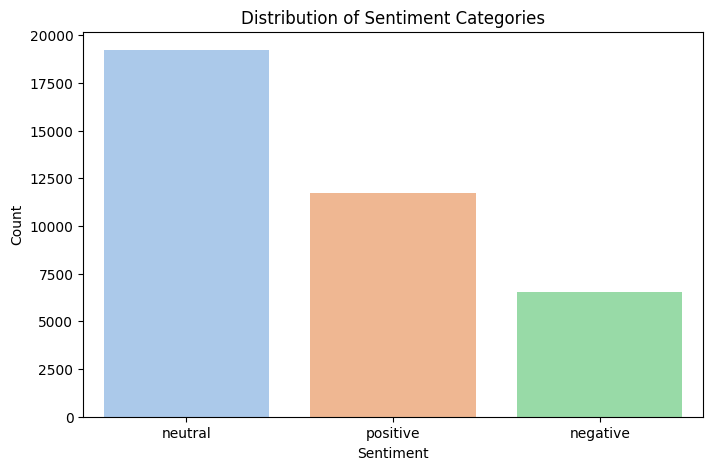

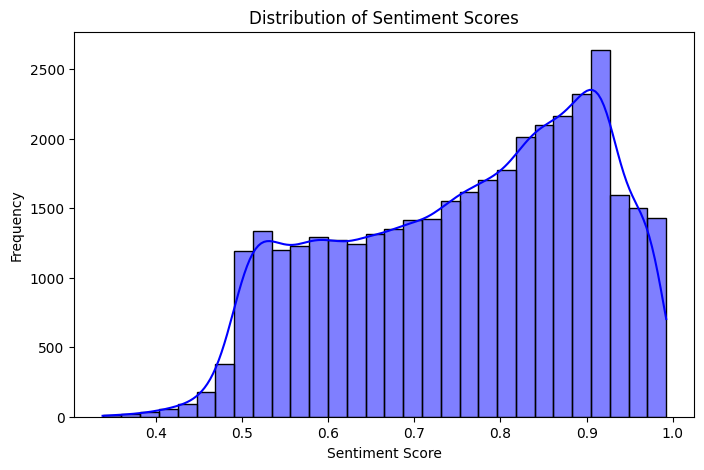

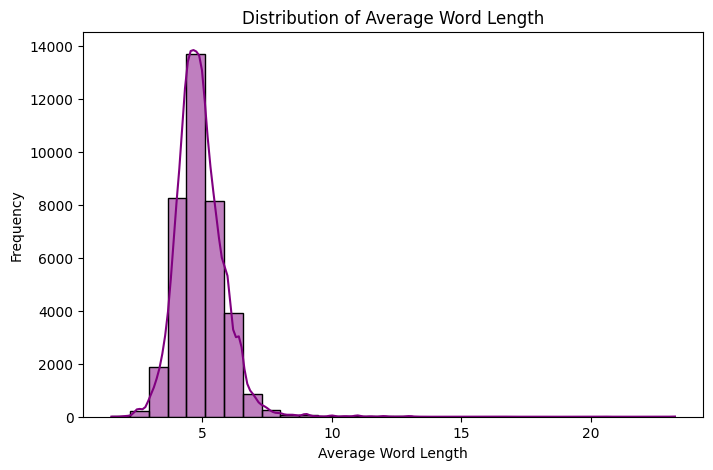

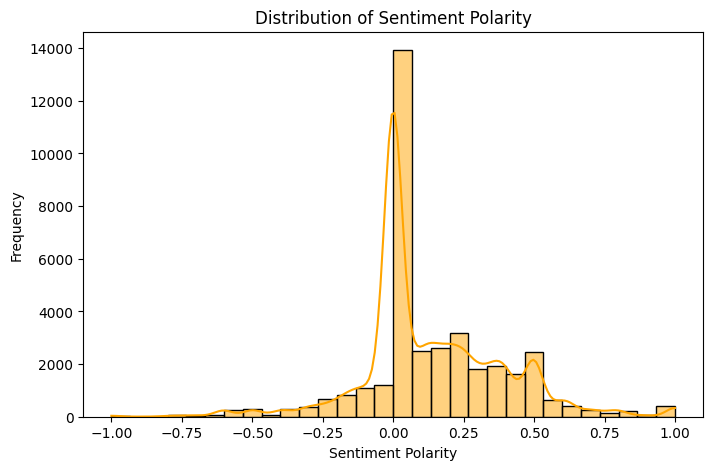

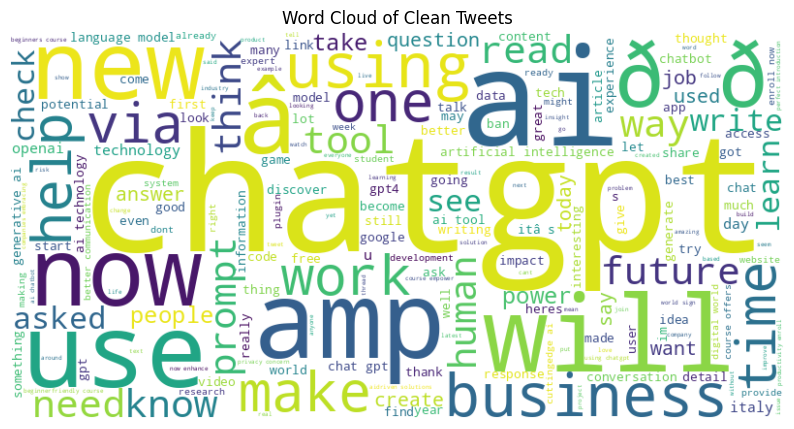

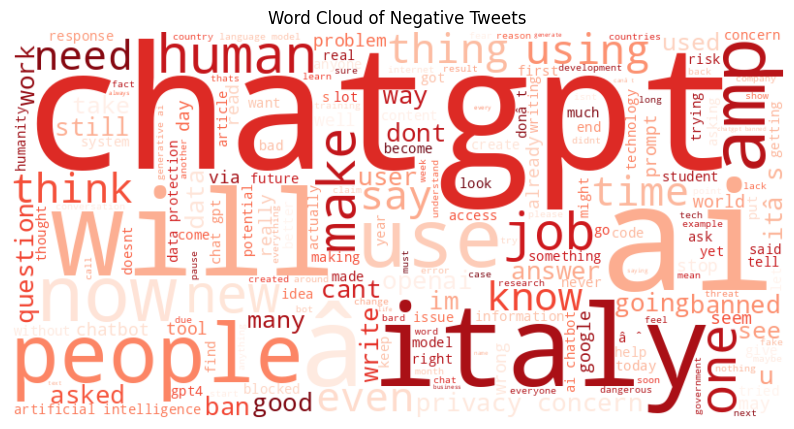

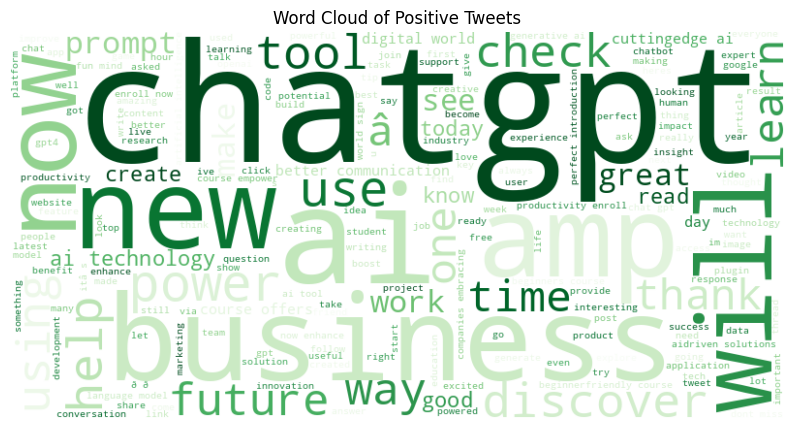

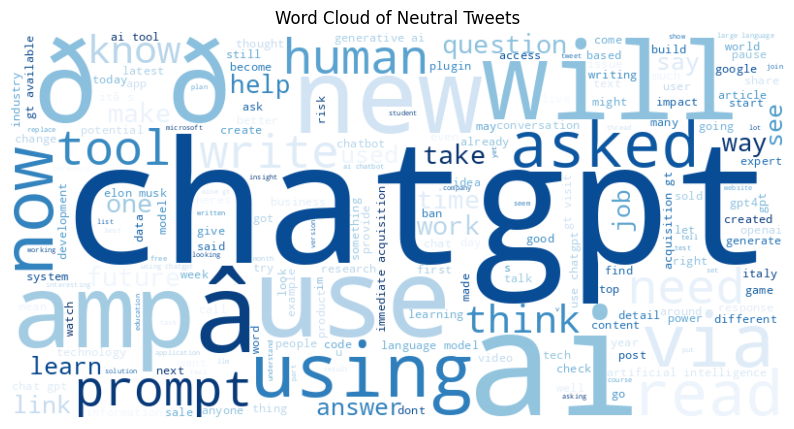

In [ ]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from textblob import TextBlob

sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="pastel")
plt.title("Distribution of Sentiment Categories")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()
print()

# Distribution of sentiment scores
plt.figure(figsize=(8, 5))
sns.histplot(df['sentiment_score'], bins=30, kde=True, color="blue")
plt.title("Distribution of Sentiment Scores")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()
print()

# Calculate average word length for each tweet
df['avg_word_length'] = df['clean_tweet'].dropna().apply(lambda x: np.mean([len(word) for word in x.split()]))

# Plot the distribution of average word length
plt.figure(figsize=(8, 5))
sns.histplot(df['avg_word_length'], bins=30, kde=True, color="purple")
plt.title("Distribution of Average Word Length")
plt.xlabel("Average Word Length")
plt.ylabel("Frequency")
plt.show()
print()

# Calculate sentiment polarity for each tweet
df['polarity'] = df['clean_tweet'].dropna().apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot the distribution of sentiment polarity
plt.figure(figsize=(8, 5))
sns.histplot(df['polarity'], bins=30, kde=True, color="orange")
plt.title("Distribution of Sentiment Polarity")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")
plt.show()
print()

# Word cloud for clean tweets
all_text = " ".join(tweet for tweet in df['clean_tweet'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Clean Tweets")
plt.show()
print()

# Word cloud for negative tweets
negative_text = " ".join(tweet for tweet in df[df['sentiment'] == 'negative']['clean_tweet'].dropna())
if negative_text.strip():  # Check if text is non-empty
    negative_wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="Reds").generate(negative_text)
    plt.figure(figsize=(10, 6))
    plt.imshow(negative_wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud of Negative Tweets")
    plt.show()
    print()
else:
    print("No negative tweets to generate a word cloud.")

# Word cloud for positive tweets
positive_text = " ".join(tweet for tweet in df[df['sentiment'] == 'positive']['clean_tweet'].dropna())
if positive_text.strip():  # Check if text is non-empty
    positive_wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="Greens").generate(positive_text)
    plt.figure(figsize=(10, 6))
    plt.imshow(positive_wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud of Positive Tweets")
    plt.show()
    print()
else:
    print("No positive tweets to generate a word cloud.")

# Word cloud for neutral tweets
neutral_text = " ".join(tweet for tweet in df[df['sentiment'] == 'neutral']['clean_tweet'].dropna())
if neutral_text.strip():  # Check if text is non-empty
    neutral_wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="Blues").generate(neutral_text)
    plt.figure(figsize=(10, 6))
    plt.imshow(neutral_wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud of Neutral Tweets")
    plt.show()
else:
    print("No neutral tweets to generate a word cloud.")

### 4. Encoding, Feature Selection and Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Convert target variable to numeric encoding if necessary
df['sentiment'] = df['sentiment'].map({'positive': 1, 'neutral': 0, 'negative': -1})

# Split the dataset into features and target variable
X = df['clean_tweet']
y = df['sentiment']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### 5. TF-IDF Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Define a pipeline with TF-IDF and a classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=10000)),
    ('classifier', LogisticRegression(max_iter=1000))
])

### 6. Hyperparameter Tuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'tfidf__max_features': [5000, 10000, 20000],
    'classifier': [
        LogisticRegression(max_iter=1000),
        RandomForestClassifier(n_estimators=100, random_state=42),
        GradientBoostingClassifier(random_state=42)
    ]
}

### 7. GridCV Search

In [ ]:
from sklearn.model_selection import GridSearchCV

# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END classifier=LogisticRegression(max_iter=1000), tfidf__max_features=5000; total time=  46.4s
[CV] END classifier=LogisticRegression(max_iter=1000), tfidf__max_features=5000; total time=  44.0s
[CV] END classifier=LogisticRegression(max_iter=1000), tfidf__max_features=5000; total time=  48.5s
[CV] END classifier=LogisticRegression(max_iter=1000), tfidf__max_features=10000; total time=  49.5s
[CV] END classifier=LogisticRegression(max_iter=1000), tfidf__max_features=10000; total time=  34.2s
[CV] END classifier=LogisticRegression(max_iter=1000), tfidf__max_features=10000; total time= 1.0min
[CV] END classifier=LogisticRegression(max_iter=1000), tfidf__max_features=20000; total time=  49.9s
[CV] END classifier=LogisticRegression(max_iter=1000), tfidf__max_features=20000; total time=  43.5s
[CV] END classifier=LogisticRegression(max_iter=1000), tfidf__max_features=20000; total time=  58.1s
[CV] END classifier=RandomForestCl

### 7. Applying Various Models

#### (i) Random Forest

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Ensure X_train and X_test are flat lists of strings
X_train = [" ".join(map(str, item)) if isinstance(item, list) else str(item) for item in X_train]
X_test = [" ".join(map(str, item)) if isinstance(item, list) else str(item) for item in X_test]

# Convert text data to numerical format using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_vectorized, y_train)
rf_predictions = rf_model.predict(X_test_vectorized)

# Evaluation Metrics
rf_acc = accuracy_score(y_test, rf_predictions)
rf_f1_score = f1_score(y_test, rf_predictions, average='weighted')

print(f"Accuracy: {rf_acc}")
print(f"F1 Score: {rf_f1_score}")
print(classification_report(y_test, rf_predictions))


#### (ii) SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score

# SVM
svm_model = SVC(random_state=42)
svm_model.fit(X_train_vectorized, y_train)
svm_predictions = svm_model.predict(X_test_vectorized)
svm_acc = accuracy_score(y_test, svm_predictions)

svm_f1_score = f1_score(y_test, svm_predictions, average='weighted')

print(f"Accuracy: {svm_acc}")
print(f"F1 Score: {svm_f1_score}")
print(classification_report(y_test, svm_predictions))

#### (iii) Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_vectorized, y_train)
nb_predictions = nb_model.predict(X_test_vectorized)
nb_acc = accuracy_score(y_test, nb_predictions)

nb_f1_score = f1_score(y_test, nb_predictions, average='weighted')

print(f"Accuracy: {nb_acc}")
print(f"F1 Score: {nb_f1_score}")
print(classification_report(y_test, nb_predictions))

#### (iv) Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_vectorized, y_train)
dt_predictions = dt_model.predict(X_test_vectorized)
dt_acc = accuracy_score(y_test, dt_predictions)

dt_f1_score = f1_score(y_test, dt_predictions, average='weighted')

print(f"Accuracy: {dt_acc}")
print(f"F1 Score: {dt_f1_score}")
print(classification_report(y_test, dt_predictions))

#### (v) K - Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_vectorized, y_train)
knn_predictions = knn_model.predict(X_test_vectorized)
knn_acc = accuracy_score(y_test, knn_predictions)

knn_f1_score = f1_score(y_test, knn_predictions, average='weighted')

print(f"Accuracy: {knn_acc}")
print(f"F1 Score: {knn_f1_score}")
print(classification_report(y_test, knn_predictions))

#### (vi) Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_vectorized, y_train)
lr_predictions = lr_model.predict(X_test_vectorized)
lr_acc = accuracy_score(y_test, lr_predictions)

lr_f1_score = f1_score(y_test, lr_predictions, average='weighted')

print(f"Accuracy: {lr_acc}")
print(f"F1 Score: {lr_f1_score}")
print(classification_report(y_test, lr_predictions))

#### (vii) Textblob

In [ ]:
from textblob import TextBlob

# Function to calculate TextBlob sentiment
def textblob_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply the TextBlob sentiment analysis to the 'clean_tweet' column
df['textblob_sentiment_score'] = df['clean_tweet'].apply(textblob_sentiment)

# Classify the sentiment based on the TextBlob sentiment score
def classify_sentiment(score):
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

df['textblob_sentiment'] = df['textblob_sentiment_score'].apply(classify_sentiment)

# Display the first few rows with the new TextBlob sentiment columns
print(df[['clean_tweet', 'textblob_sentiment_score', 'textblob_sentiment']].head())

#### (ix) LSTM

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['sentiment'])

# Tokenize the input data
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['clean_tweet'])
sequences = tokenizer.texts_to_sequences(df['clean_tweet'])
padded_sequences = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Define the LSTM model
model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=100),
    LSTM(64, return_sequences=True),
    Dropout(0.5),
    LSTM(64),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
print()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#### (x) CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['sentiment'])

# Tokenize the input data
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['clean_tweet'])
sequences = tokenizer.texts_to_sequences(df['clean_tweet'])
padded_sequences = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Define the LSTM model
model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=100),
    LSTM(64, return_sequences=True),
    Dropout(0.5),
    LSTM(64),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
print()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#### (xi) RNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['sentiment'])

# Tokenize the input data
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['clean_tweet'])
sequences = tokenizer.texts_to_sequences(df['clean_tweet'])
padded_sequences = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Define the RNN model
model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=100),
    SimpleRNN(64, return_sequences=True),
    Dropout(0.5),
    SimpleRNN(64),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
print()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#### (xii) ANN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['sentiment'])

# Tokenize the input data
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['clean_tweet'])
sequences = tokenizer.texts_to_sequences(df['clean_tweet'])
padded_sequences = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Define the ANN model
model = Sequential([
    Dense(512, activation='relu', input_shape=(100,)),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
print()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
print()

### 8. Results

In [ ]:
import pandas as pd

# Create a dictionary with model names and their corresponding accuracy and F1 scores
model_comparison = {
    'Model': ['Random Forest', 'SVM', 'Naive Bayes', 'Decision Tree', 'K-Nearest Neighbors', 'Logistic Regression', 'LSTM', 'CNN', 'RNN', 'ANN'],
    'Accuracy': [rf_acc, svm_acc, nb_acc, dt_acc, knn_acc, lr_acc, accuracy, accuracy, accuracy, accuracy],
    'F1 Score': [rf_f1_score, svm_f1_score, nb_f1_score, dt_f1_score, knn_f1_score, lr_f1_score, history.history['val_accuracy'][-1], history.history['val_accuracy'][-1], history.history['val_accuracy'][-1], history.history['val_accuracy'][-1]]
}

# Create a DataFrame from the dictionary
comparison_df = pd.DataFrame(model_comparison)

# Display the comparison table
print(comparison_df)

In [ ]:
import gensim
from gensim.models import Word2Vec
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.model_selection import train_test_split

# Tokenize the tweets
tokenized_tweets = df['clean_tweet'].apply(lambda x: x.split())

# Train a Word2Vec model
w2v_model = Word2Vec(sentences=tokenized_tweets, vector_size=100, window=5, min_count=1, workers=4)

# Create a function to average word vectors for a tweet
def average_word_vectors(words, model, vocabulary, num_features):
    feature_vector = np.zeros((num_features,), dtype="float32")
    n_words = 0
    for word in words:
        if word in vocabulary:
            n_words += 1
            feature_vector = np.add(feature_vector, model.wv[word])
    if n_words > 0:
        feature_vector = np.divide(feature_vector, n_words)
    return feature_vector

# Create feature vectors for all tweets
tweet_vectors = np.array([average_word_vectors(tweet, w2v_model, w2v_model.wv.key_to_index, 100) for tweet in tokenized_tweets])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(tweet_vectors, df['sentiment'], test_size=0.2, random_state=42, stratify=df['sentiment'])

# Train a Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Evaluate the model
lr_acc = accuracy_score(y_test, lr_predictions)
lr_f1_score = f1_score(y_test, lr_predictions, average='weighted')

print(f"Accuracy: {lr_acc}")
print(f"F1 Score: {lr_f1_score}")
print(classification_report(y_test, lr_predictions))

In [ ]:
# Install missing packages
#%pip install torch transformers scikit-learn

import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import accuracy_score, f1_score

# Encode the labels
label_encoder = LabelEncoder()
df['encoded_sentiment'] = label_encoder.fit_transform(df['sentiment'])

# Tokenize the input data
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

class TweetDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )
        return {
            'text': text,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Prepare the dataset
MAX_LEN = 128
BATCH_SIZE = 16

X_train, X_test, y_train, y_test = train_test_split(df['clean_tweet'], df['encoded_sentiment'], test_size=0.2, random_state=42, stratify=df['encoded_sentiment'])

train_dataset = TweetDataset(X_train.tolist(), y_train.tolist(), tokenizer, MAX_LEN)
test_dataset = TweetDataset(X_test.tolist(), y_test.tolist(), tokenizer, MAX_LEN)

train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE)

# Load the BERT model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(label_encoder.classes_))

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=BATCH_SIZE,
    per_device_eval_batch_size=BATCH_SIZE,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
)

# Define the compute_metrics function
def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    acc = accuracy_score(p.label_ids, preds)
    f1 = f1_score(p.label_ids, preds, average='weighted')
    return {'accuracy': acc, 'f1': f1}

# Define the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

# Train the model
trainer.train()

# Save the model
model.save_pretrained('./trained_model')
tokenizer.save_pretrained('./trained_model')

# Evaluate the model
results = trainer.evaluate()
print(results)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Step,Training Loss
10,1.220900
20,1.238300
30,1.159200
40,1.103100
50,1.056400
60,1.011300
70,0.893400
80,0.917100
90,0.849900
100,0.911500


{'eval_loss': 0.6487549543380737, 'eval_accuracy': 0.85775, 'eval_f1': 0.8571179074269414, 'eval_runtime': 31.428, 'eval_samples_per_second': 127.275, 'eval_steps_per_second': 7.955, 'epoch': 3.0}


In [ ]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import torch
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

# Load the tokenizer and model
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=len(df['encoded_sentiment'].unique()))

# Split the dataset into training and validation sets
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['encoded_sentiment'])

# Tokenize the datasets
train_encodings = tokenizer(train_df['clean_tweet'].tolist(), truncation=True, padding=True, max_length=128)
val_encodings = tokenizer(val_df['clean_tweet'].tolist(), truncation=True, padding=True, max_length=128)

# Define a Dataset class
class TweetDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Create Dataset objects
train_dataset = TweetDataset(train_encodings, train_df['encoded_sentiment'].tolist())
val_dataset = TweetDataset(val_encodings, val_df['encoded_sentiment'].tolist())

# Define the training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch",
)

# Define the compute_metrics function
def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    acc = accuracy_score(p.label_ids, preds)
    f1 = f1_score(p.label_ids, preds, average='weighted')
    return {'accuracy': acc, 'f1': f1}

# Create the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)

# Train the model
trainer.train()

# Evaluate the model
results = trainer.evaluate()
print(results)

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.471500,0.428050,0.818250,0.820948
2,0.283300,0.544165,0.850000,0.847415
3,0.250500,0.621666,0.869750,0.869741


{'eval_loss': 0.621665894985199, 'eval_accuracy': 0.86975, 'eval_f1': 0.8697414582158258, 'eval_runtime': 27.4549, 'eval_samples_per_second': 145.694, 'eval_steps_per_second': 18.212, 'epoch': 3.0}
